ADICIONAR NO README (Resumo do projeto e resultados)

* Descrição da arquitetura e das dúvidas
  * Estratégia analítica: avaliação da performance 

# Projeto de Arquitetura de Dados para Big Data

## Descrição

[....]

## Estratégias do Desenvolvimento do Projeto

Os principais pontos do 

1. **PROTOTIPAGEM**

A primeira etapa é a criação de uma versão inicial e experimental do sistema. Ela serve para testar e validar ideias antes da implementação em larga escala. No caso de Big Data, onde há grandes quantidades de dados, há o problema dos recursos exigidos, tornando lento e caro o processo experimental de desenvolvimento da solução. Uma solução adota aqui é a utilização de uma **amostra**, que é uma parte menor do conjunto total de dados. A vantagem dela é permitir uma manipulação mais fácil e testes iniciais das estratégias, ou seja, ela é mais gerenciável do que um arquivo de grandes dimensões. 

No entanto, pela técnica utilizada para obtenção da amostra, não podemos afirmar que ela é representativa do conjunto total. Então após a aprovação desta primeira solução é que será testado com a verdadeira grandeza dos dados para avaliar o desempenho em uma escala mais ampla e realista.

2. **DÚVIDAS SOBRE A ARQUITETURA DE DADOS BIG DATA**

[....]

3. **ABORDAGEM ANALÍTICA: avaliação da performance**

[....]

* `Consultas esperadas` X `Estratégia de particionamento` X `Estratégia de cálculo do desempenho` X `Amostragem ou Base completa`

[...] resultados


# Códigos experimentais

In [0]:
# BACKUP
# dbutils.fs.cp('dbfs:/FileStore/modulo_big_data/', 'dbfs:/FileStore/modulo_big_data/backup/', True)
for f in dbutils.fs.ls('dbfs:/FileStore/modulo_big_data/'):
    dbutils.fs.cp(f.path, 'dbfs:/FileStore/modulo_big_data/backup/'+f.name, True)

In [0]:
df_spark = spark.read.parquet('dbfs:/FileStore/modulo_big_data/resultados_desempenho/resultados_geral.parquet')

In [0]:
import pyspark.pandas as ps

df_resultados_parquet_pd = ps.read_parquet('dbfs:/FileStore/modulo_big_data/resultados_desempenho/resultados_geral.parquet').to_pandas()

df_resultados_parquet_pd.head(15)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1125695298282360>:5
      1 import pyspark.pandas as ps
      3 df_resultados_parquet_pd = ps.read_parquet('dbfs:/FileStore/modulo_big_data/resultados_desempenho/resultados_geral.parquet').to_pandas()
----> 5 df_resultados_parquet.head(15)

NameError: name 'df_resultados_parquet' is not defined

In [0]:
df_resultados_csv_pd = ps.read_csv('dbfs:/FileStore/modulo_big_data/resultados_desempenho/resultados_geral_csv.csv', names=['tempo_consulta', 'consulta', 'particionamento', 'tipo_tabela', 'tipo_de_consultas']).to_pandas()


df_resultados_csv_pd.head(15)

,tempo_consulta,consulta,particionamento,tipo_tabela,tipo_de_consultas
0,0.0699,consulta_2_para_filtrar_dados_sudeste,car_sample_part_ano_uf,sample,tempview
1,0.0778,consulta_2_para_filtrar_dados_sudeste,car_sample_part_ano_uf,sample,tempview
2,0.1036,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview
3,0.0819,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview
4,0.0723,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview
5,0.0911,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview
6,0.0937,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview
7,0.0926,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview
8,0.0931,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview
9,0.0781,consulta_2_para_filtrar_dados_sudeste,car_sample_part_uf_ano,sample,tempview


In [0]:
mapper_coluna_particao = {
    'car_sample':'Sem partição', 
    'car_sample_part_uf':'UF', 
    'car_sample_part_ano':'ANO', 
    'car_sample_part_uf_ano':'UF + ANO', 
    'car_sample_part_ano_uf':'ANO + UF',
    
    'car_total':'Sem partição', 
    'car_total_part_uf':'UF', 
    'car_total_part_ano':'ANO', 
    'car_total_part_uf_ano':'UF + ANO', 
    'car_total_part_ano_uf':'ANO + UF',}

In [0]:
sorted(df_resultados_csv_pd['consulta'].unique())

Out[88]: ['consulta_1_soma_area',
 'consulta_2_para_filtrar_dados_sudeste',
 'consulta_3_calc_por_ano',
 'consulta_4_calc_percentual_medio',
 'consulta_5_conta_prop_por_uf',
 'consulta_6_media_area_por_uf']

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plotar_boxplot(tipo_de_tabela, df_resultados, tipo_de_consultas):
    # Pre-tratamento do dataframe
    df = df_resultados.copy()
    df['particionamento'] = df['particionamento'].replace(mapper_coluna_particao)
    # df['consulta'] = df['consulta'].replace({'consulta_': ''}, regex=True)


    # Create the box plot
    sns.set_theme(rc={'figure.figsize':(20,9)})
    sns.set_palette("Set1")

    ax = sns.boxplot(
        x='consulta', y='tempo_consulta', data=df, 
        hue='particionamento', hue_order=list(mapper_coluna_particao.values())[:5], 
        order=['consulta_1_soma_area',
            'consulta_2_para_filtrar_dados_sudeste',
            'consulta_3_calc_por_ano',
            'consulta_4_calc_percentual_medio',
            'consulta_5_conta_prop_por_uf',
            'consulta_6_media_area_por_uf'])

    # Aparência do gráfico
    plt.legend(title='TIPO DE PARTIÇÃO', loc='upper right')
    plt.title(f'Desempenho das Consultas e dos Particionamentos - {tipo_de_tabela} ({tipo_de_consultas})', fontsize=20, loc='left')
    plt.xlabel('Consulta', fontsize=16)
    ax.tick_params(axis='x', labelrotation=0)
    plt.ylabel('Tempo de Execução (s)', fontsize=16)
    plt.show()

# + limite inferior = 0

def plotar_barras(tipo_de_tabela, df_resultados, tipo_de_consultas):
    # Pre-tratamento do dataframe
    df_grupo = df_resultados.groupby(['consulta', 'particionamento']).mean().reset_index()
    df_grupo['particionamento'] = df_grupo['particionamento'].replace(mapper_coluna_particao)
    df = df_grupo

    # Create the box plot
    sns.set_theme(rc={'figure.figsize':(20,9)})
    sns.set_palette("Set1")

    ax = sns.barplot(x='consulta', y='tempo_consulta', data=df, 
                hue='particionamento',
                hue_order=list(mapper_coluna_particao.values())[:5])

    # Aparência do gráfico
    plt.legend(title='TIPO DE PARTIÇÃO', loc='upper right')
    plt.title(f'Desempenho das Consultas e dos Particionamentos - {tipo_de_tabela} ({tipo_de_consultas})', fontsize=20, loc='left')
    plt.xlabel('Consulta', fontsize=16)
    ax.tick_params(axis='x', labelrotation=0)
    plt.ylabel('Tempo médio de Execução (s)', fontsize=16)
    plt.show()

In [0]:
def gerar_grafico(tipo_tabela, tipo_de_consultas, tipo_de_grafico):
    df = df_resultados_parquet_pd.copy()
    selector_tipo_tabela = df['tipo_tabela'] == tipo_tabela # total | sample
    selector_tipo_de_consultas = df['tipo_de_consultas'] == tipo_de_consultas # display | tempview | saving
    selector = selector_tipo_tabela & selector_tipo_de_consultas

    # Amostra | Completa
    if tipo_tabela == 'total':
        tipo_de_tabela = 'Completa' 
    else:
        tipo_de_tabela = 'Amostra'

    # plotagem
    if tipo_de_grafico == 'boxplot':
        plotar_boxplot(tipo_de_tabela=tipo_de_tabela, df_resultados=df[selector], tipo_de_consultas=tipo_de_consultas)
    else:
        plotar_barras(tipo_de_tabela=tipo_de_tabela, df_resultados=df[selector], tipo_de_consultas=tipo_de_consultas)

In [0]:
df_resultados_parquet_pd.reset_index().groupby(['tipo_de_consultas', 'tipo_tabela'])[['index']].count()

index 
 
 
 tipo_de_consultas 
 tipo_tabela 
 
 
 
 
 
 display 
 total 
 102 
 
 
 saving 
 sample 
 120 
 
 
 total 
 44 
 
 
 tempview 
 sample 
 1800 
 
 
 total 
 1960


#### Modo de Execução

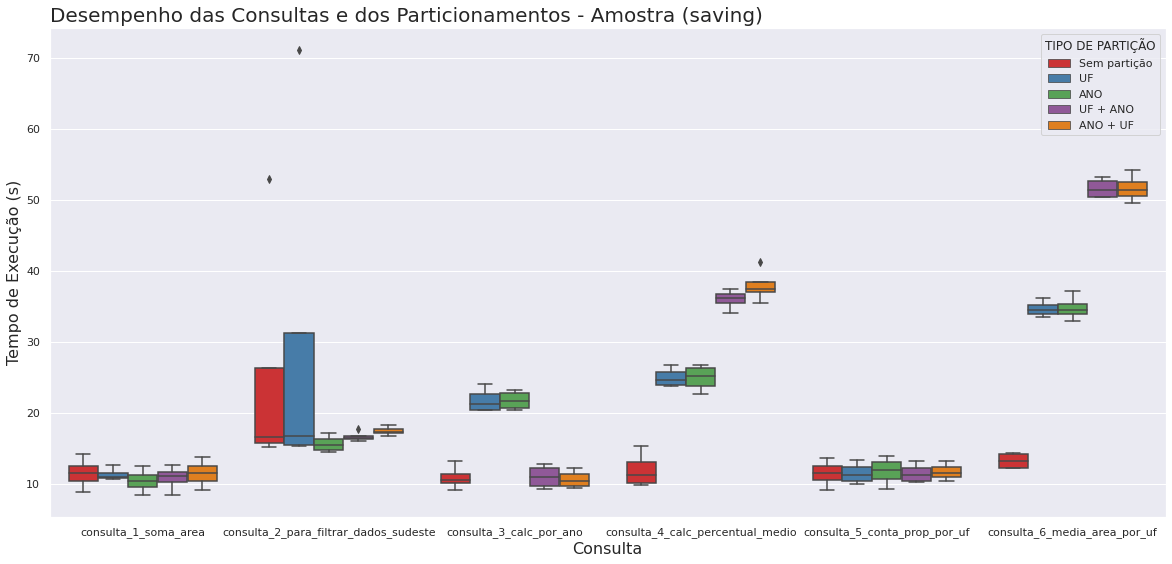

In [0]:
# SAMPLE - SAVING
gerar_grafico(tipo_tabela='sample', tipo_de_consultas='saving', tipo_de_grafico='boxplot')

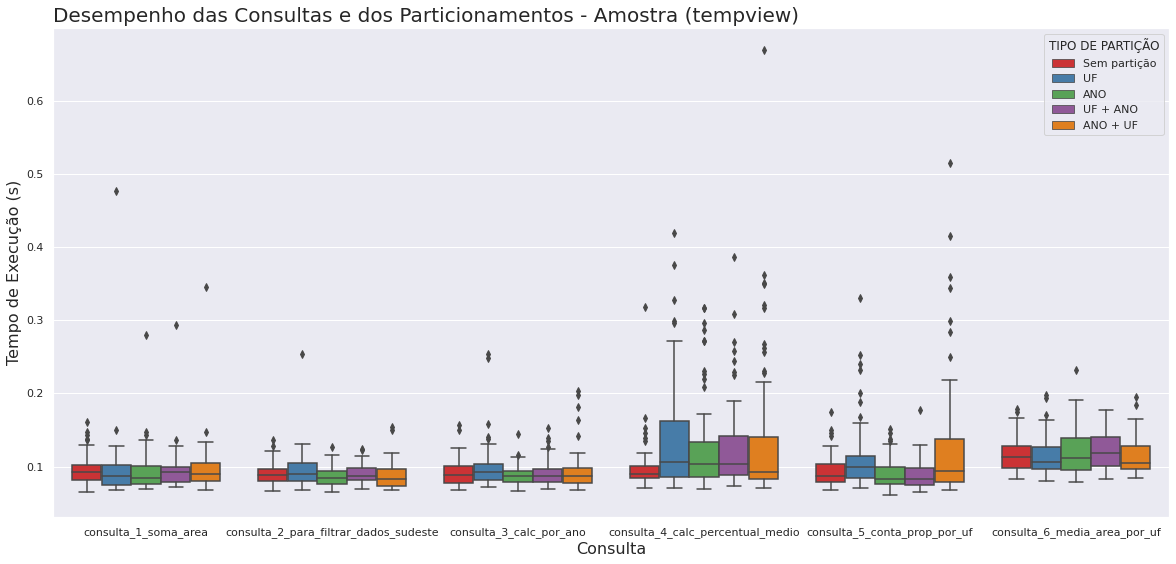

In [0]:
# SAMPLE - TEMPVIEW
gerar_grafico(tipo_tabela='sample', tipo_de_consultas='tempview', tipo_de_grafico='boxplot')

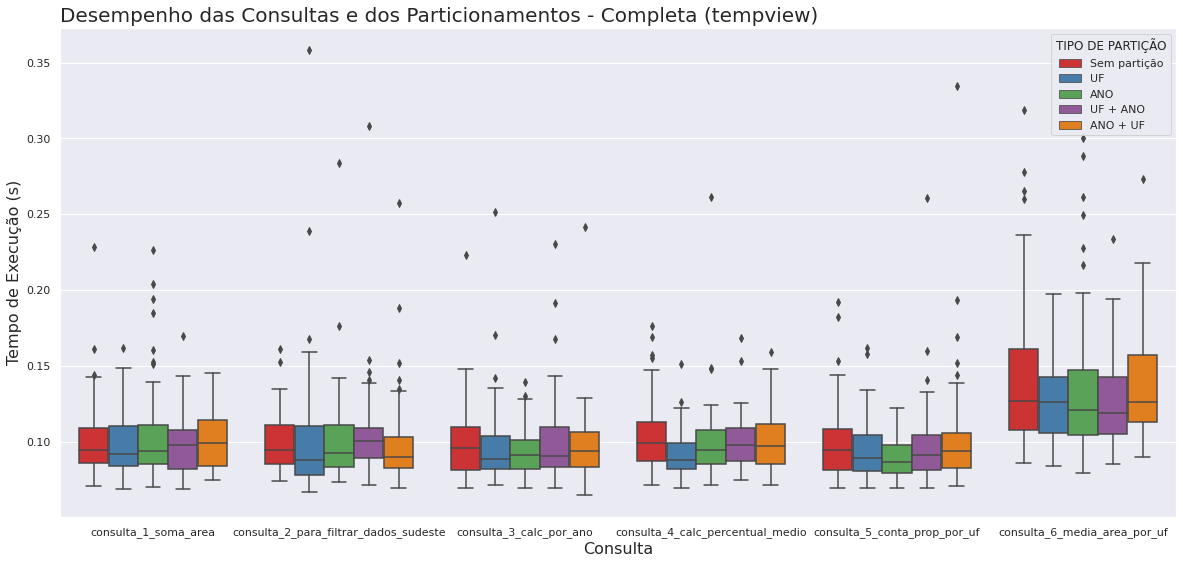

In [0]:
# TOTAL - TEMPVIEW
gerar_grafico(tipo_tabela='total', tipo_de_consultas='tempview', tipo_de_grafico='boxplot')

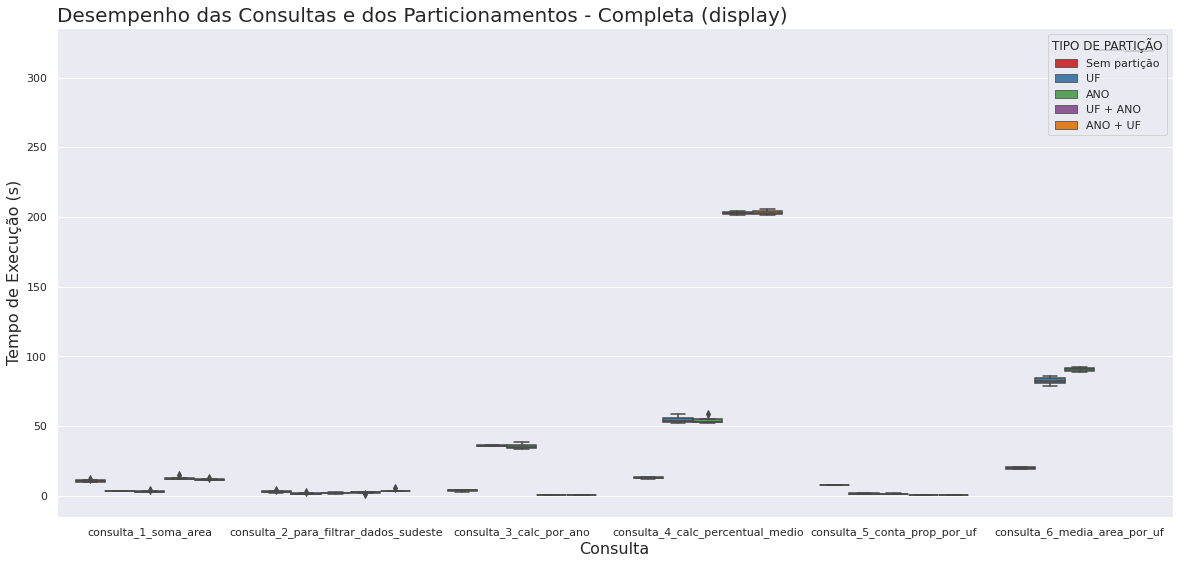

In [0]:
# TOTAL - DISPLAY
gerar_grafico(tipo_tabela='total', tipo_de_consultas='display', tipo_de_grafico='boxplot')

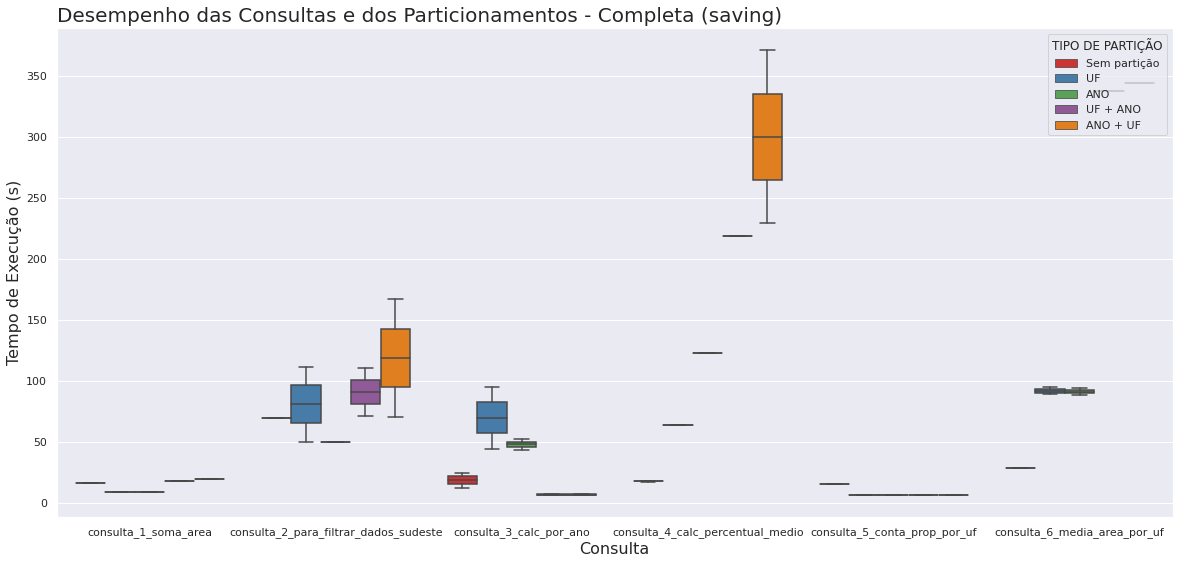

In [0]:
# TOTAL - SAVING
gerar_grafico(tipo_tabela='total', tipo_de_consultas='saving', tipo_de_grafico='boxplot')


#### Gráfico de Caixa ou Barras?

O gráfico de caixa (boxplot) traz muitas informações, como a medida central da mediana e uma representação gráfica da dispersão dos dados. Isso possibilita a análise mais profunda, considerando os riscos da variação do processamento. No entanto, este gráfico traz maior complexidade de compreensão devido à poluição gráfica de tantas informações.

O gráfico de barras traz somente a informação da média do tempo de execução, sendo mais direto na mensagem que deseja passar. Ele é mais fácil de compreensão e mais agradável de ser visto. No entanto, ele oculta muitas informações que podem ser observadas no outro tipo de gráfico.

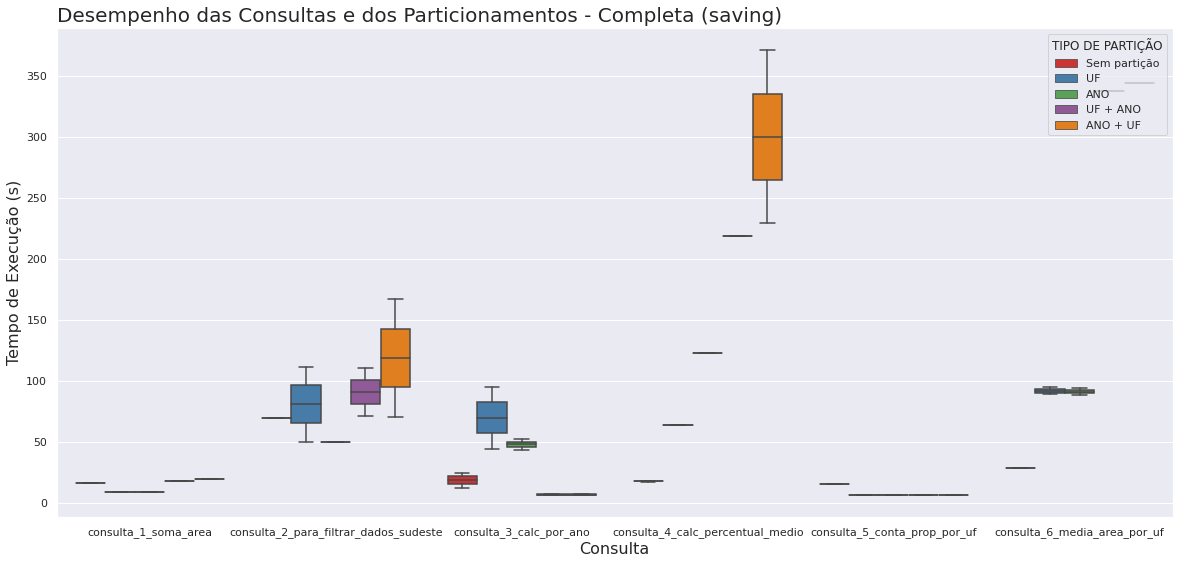

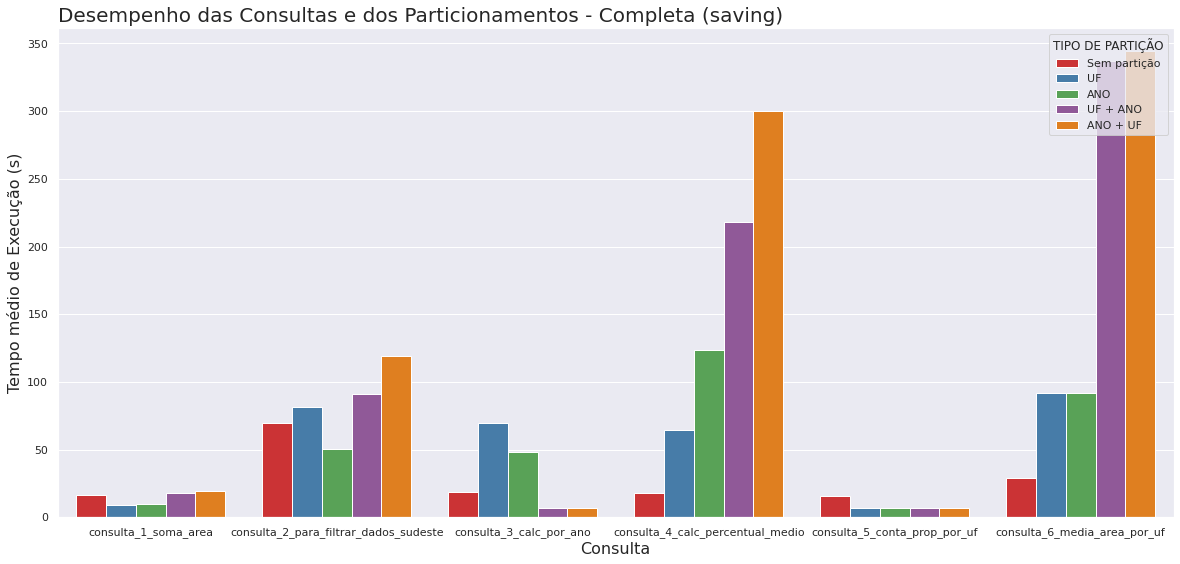

In [0]:
# TOTAL - SAVING - BOX
gerar_grafico(tipo_tabela='total', tipo_de_consultas='saving', tipo_de_grafico='boxplot')

# TOTAL - SAVING - BAR
gerar_grafico(tipo_tabela='total', tipo_de_consultas='saving', tipo_de_grafico='bar')

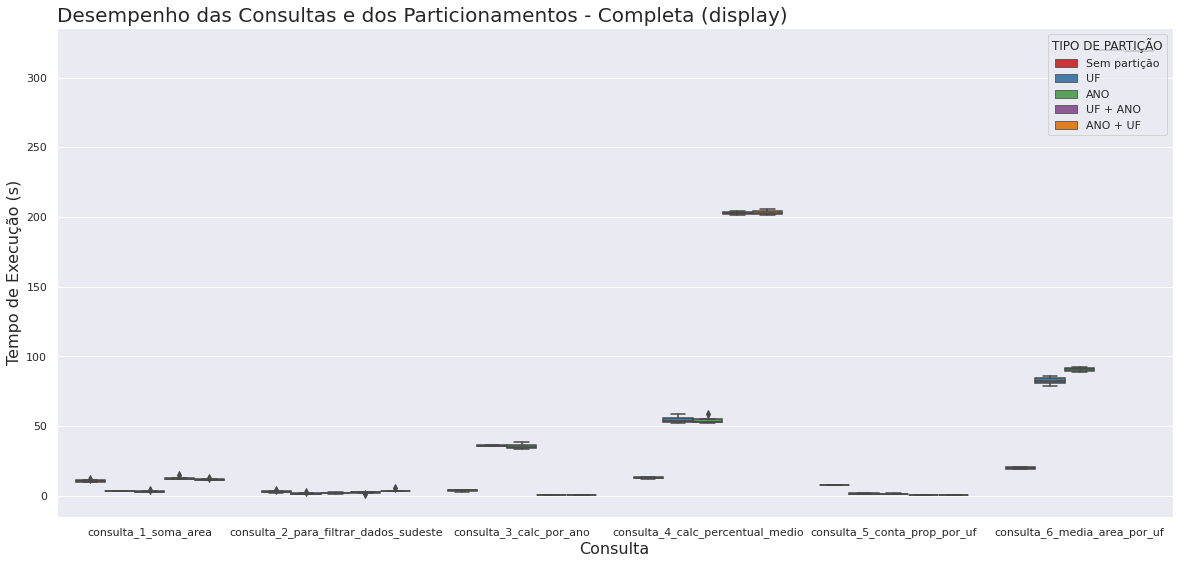

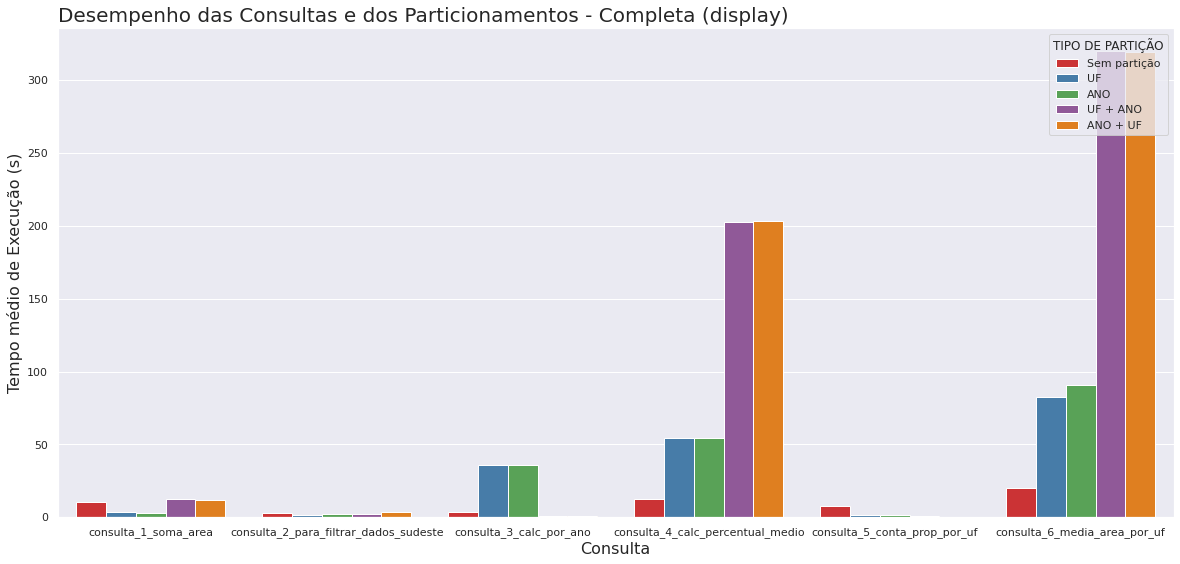

In [0]:
# TOTAL - DISPLAY
gerar_grafico(tipo_tabela='total', tipo_de_consultas='display', tipo_de_grafico='boxplot')

# TOTAL - DISPLAY - BARRAS
gerar_grafico(tipo_tabela='total', tipo_de_consultas='display', tipo_de_grafico='bar')


#### Comparação entre Amostra e Base Completa no caso do SAVING

O uso de uma amostra permite a realização dos teste em até 1/7 do tempo que de execução da base completa. Isso multiplica nos diversos testes necessários (600 execuções para obtenção de medidas estatíticas) resulta em uma grande vantagem de ganho de tempo.

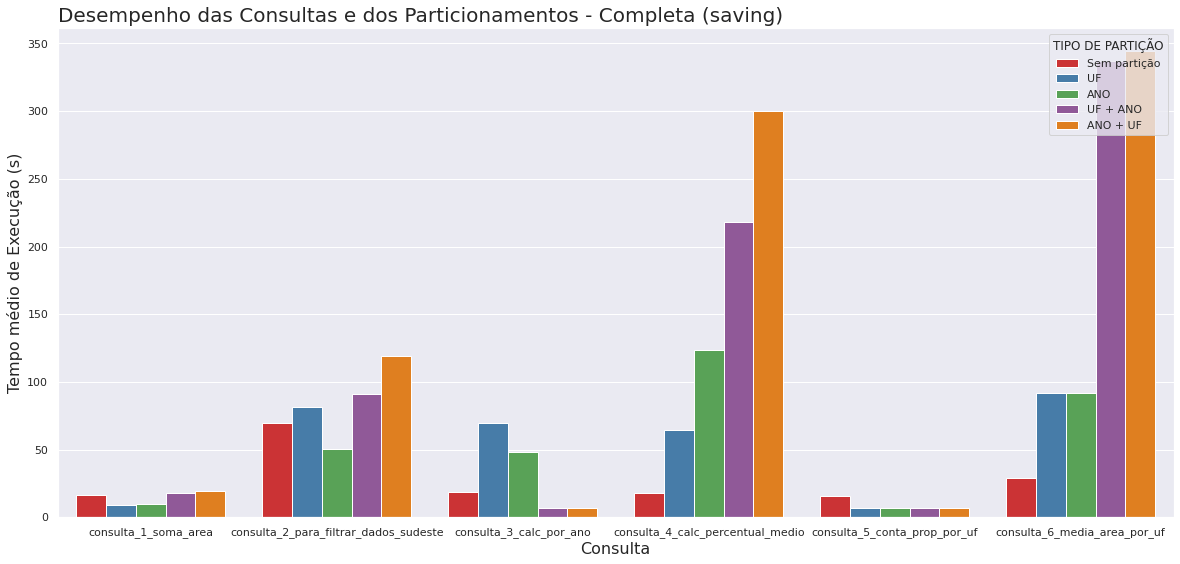

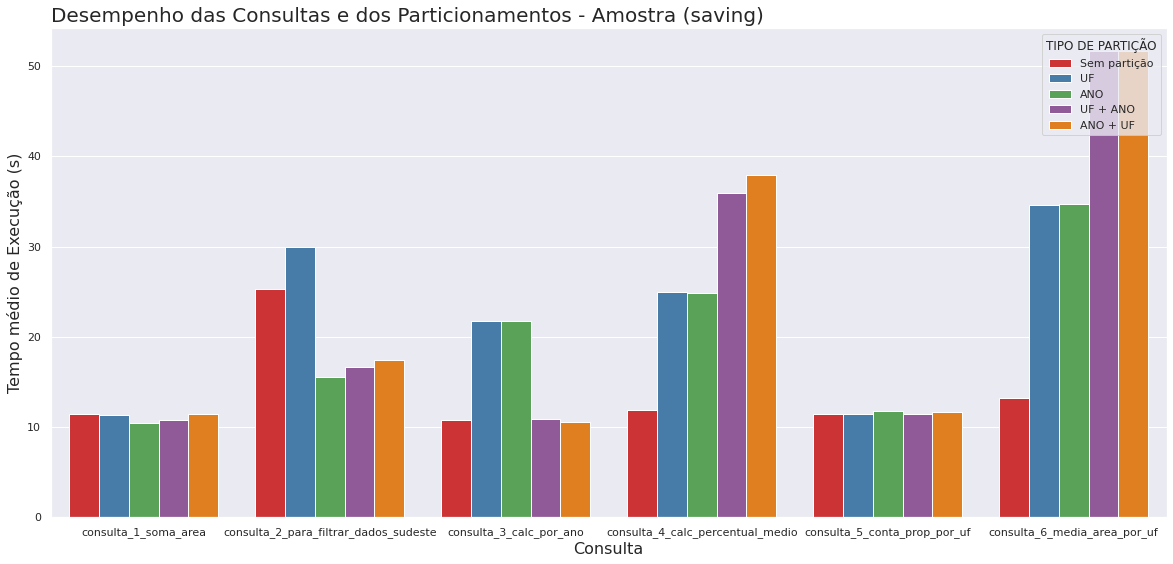

In [0]:
# TOTAL - SAVING
gerar_grafico(tipo_tabela='total', tipo_de_consultas='saving', tipo_de_grafico='bar')

# TOTAL - SAVING
gerar_grafico(tipo_tabela='sample', tipo_de_consultas='saving', tipo_de_grafico='bar')